# 주제 : 매장 데이터 크롤링 후 분석
# 목적 : 사이트 크롤링을 통한 데이터 탐색 및 분석
# 제출처 :

# 제목



In [3]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 분석 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이터 탐색
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)
- + 시각화 화면 제시 

In [5]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터수집
#### 클로링 방법을 이용하여 수집 함
#### py 로 작성하여 됨.

In [ ]:
result = []      
sido_list1 = ['서울', '경기', '인천', '강원', '충북', '충남', '경북',
        '경남', '대전', '대구', '전북', '전남', '광주', '울산', '부산',
        '제주특별자치도', '세종특별자치시']

print("60계 주소 크롤링 시작")
url = getsixtyStroeurl()
for sido in sido_list1:
    getsixtyAdress(url, sido, result)

#print(result)
sixty_table = pd.DataFrame(result, columns=('store', 'sido', 'gungu', 'address', 'phone'))
sixty_table.head()
sixty_table.to_csv('sixty_table.csv',encoding='cp949',index =True)                
print("60계 주소 크롤링 종료")

In [7]:
df1 = pd.read_csv('sixty_table.csv',encoding='cp949')
df1.head()

,store,sido,gungu,address,phone
0,서울신도림점,서울,구로구,"서울 구로구 경인로67길 23 (신도림동, 신도림2차푸르지오) 1층 109호, 11...",02-2633-7732
1,서울대학로점,서울,종로구,서울 종로구 창경궁로 247 (명륜2가) 1층,02-745-6060
2,서울상도점,서울,동작구,서울 동작구 상도로 349-1 (상도동),02-3280-8260
3,서울은평구뉴타운점,서울,은평구,"서울 은평구 진관3로 67 (진관동, 은평뉴타운 구파발) 909동 1층 제상가 105호",02-356-6082
4,서울세곡점,서울,강남구,서울 강남구 자곡로 202 (자곡동) 1동 1층 120호 (강남힐스테이트에코),02-459-6050


# 데이타 전처리 

In [8]:
df = pd.DataFrame(df1)

In [9]:
df.shape

(585, 5)

In [10]:
df.store.duplicated()
df.shape

(585, 5)

In [11]:
df['sido'].unique()

array(['서울', '경기', '인천', '강원', '충북', '충남', '경북', '경남', '대전', '대구', '부산',
       '전북', '전남', '광주', '울산', '제주특별자치도', '세종특별자치시'], dtype=object)

In [12]:
freq = df.groupby('sido').count().gungu
freq

sido
강원          23
경기         152
경남          45
경북          33
광주          22
대구          33
대전          15
부산          34
서울          78
세종특별자치시      5
울산          19
인천          30
전남          21
전북          22
제주특별자치도      9
충남          25
충북          19
Name: gungu, dtype: int64

In [30]:
df['count'] = df.groupby('sido').store.transform('count')
df.head()

,store,sido,gungu,address,phone,count
0,서울신도림점,서울,구로구,"서울 구로구 경인로67길 23 (신도림동, 신도림2차푸르지오) 1층 109호, 11...",02-2633-7732,78
1,서울대학로점,서울,종로구,서울 종로구 창경궁로 247 (명륜2가) 1층,02-745-6060,78
2,서울상도점,서울,동작구,서울 동작구 상도로 349-1 (상도동),02-3280-8260,78
3,서울은평구뉴타운점,서울,은평구,"서울 은평구 진관3로 67 (진관동, 은평뉴타운 구파발) 909동 1층 제상가 105호",02-356-6082,78
4,서울세곡점,서울,강남구,서울 강남구 자곡로 202 (자곡동) 1동 1층 120호 (강남힐스테이트에코),02-459-6050,78


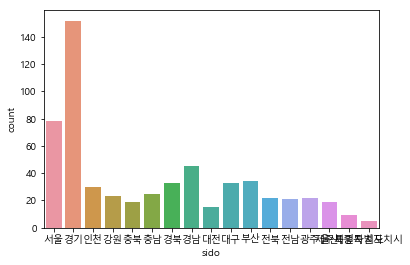

In [13]:
sns.countplot(x="sido", data=df)
plt.show()

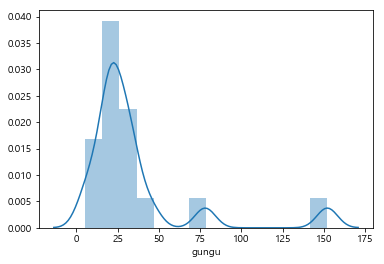

In [14]:
sns.distplot(freq)
plt.show()

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [36]:
data = df[["sido", "count"]]
label = df['store']

In [37]:
data.columns, len(data.columns)

(Index(['sido', 'count'], dtype='object'), 2)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, train_size = 0.7, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((409, 2), (176, 2), (409,), (176,))

In [40]:
x_train.head()

,sido,count
567,부산,34
273,강원,23
371,경남,45
536,울산,19
416,대전,15


### 데이타 학습  : 모델링

In [41]:
clf = SVC()
clf.fit(x_train, y_train)

ValueError: could not convert string to float: '인천'

### 데이터 예측 

In [43]:
y_pred = clf.predict(x_test)
y_pred

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [21]:
# 정답률 
print(f'정답률은? \
          {round(accuracy_score(y_test, y_pred),2)*100} %')

NameError: name 'y_pred' is not defined